# <center><b><h1>NeuralNetwork (Second Run - Ratio 1)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../../../Data/other_patients/ratio1/X_train.csv", index_col=0)
df_X_train.shape

(9826, 14)

In [3]:
df_y_train = pd.read_csv("../../../Data/other_patients/ratio1/y_train.csv", index_col=0)
df_y_train.shape

(9826, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/other_patients/ratio1/X_val.csv", index_col=0)
df_X_val.shape

(30777, 14)

In [5]:
df_y_val = pd.read_csv("../../../Data/other_patients/ratio1/y_val.csv", index_col=0)
df_y_val.shape

(30777, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

In [6]:
best_score_sl = actual_score = 0.5
best_i_sl = 0
for i in range(1,29,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  1 Best_Score:  0.6683758549354049 Actual_Score:  0.6683758549354049
I:  2 Best_I:  1 Best_Score:  0.6683758549354049 Actual_Score:  0.6645050557291228
I:  3 Best_I:  3 Best_Score:  0.7268756121759689 Actual_Score:  0.7268756121759689
I:  4 Best_I:  3 Best_Score:  0.7268756121759689 Actual_Score:  0.7247845984970025
I:  5 Best_I:  5 Best_Score:  0.746141898167694 Actual_Score:  0.746141898167694
I:  6 Best_I:  5 Best_Score:  0.746141898167694 Actual_Score:  0.7384059782149793
I:  7 Best_I:  7 Best_Score:  0.7530665266402095 Actual_Score:  0.7530665266402095
I:  8 Best_I:  8 Best_Score:  0.7720554546989783 Actual_Score:  0.7720554546989783
I:  9 Best_I:  8 Best_Score:  0.7720554546989783 Actual_Score:  0.7590794562188634
I:  10 Best_I:  8 Best_Score:  0.7720554546989783 Actual_Score:  0.7693250971037744
I:  11 Best_I:  8 Best_Score:  0.7720554546989783 Actual_Score:  0.768547074221059
I:  12 Best_I:  8 Best_Score:  0.7720554546989783 Actual_Score:  0.7662818753694165
I:  1

In [7]:
best_score_twol = actual_score = 0.5
best_i_twol = best_j_twol = 0
for i in range(1,29,1):
    for j in range(1,29,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
Best_I:  1 Best_J:  10 Best_Score:  0.671226272903825 Actual_Score:  0.6696171367052267
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
Best_I:  2 Best_J:  21 Best_Score:  0.709730505361817 Actual_Score:  0.7055726061808664
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 - 3
I,J:  3 - 4
I,J:  3 - 5
I,J:  3 - 6
I,J:  3 - 7
I,J:  3 - 8
I,J:  3 - 9
I,J:  

I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 17
I,J:  19 - 18
I,J:  19 - 19
I,J:  19 - 20
I,J:  19 - 21
I,J:  19 - 22
I,J:  19 - 23
I,J:  19 - 24
I,J:  19 - 25
I,J:  19 - 26
I,J:  19 - 27
I,J:  19 - 28
Best_I:  19 Best_J:  17 Best_Score:  0.7980605420923752 Actual_Score:  0.7837339778772271
I,J:  20 - 1
I,J:  20 - 2
I,J:  20 - 3
I,J:  20 - 4
I,J:  20 - 5
I,J:  20 - 6
I,J:  20 - 7
I,J:  20 - 8
I,J:  20 - 9
I,J:  20 - 10
I,J:  20 - 11
I,J:  20 - 12
I,J:  20 - 13
I,J:  20 - 14
I,J:  20 - 15
I,J:  20 - 16
I,J:  20 - 17
I,J:  20 - 18
I,J:  20 - 19
I,J:  20 - 20
I,J:  20 - 21
I,J:  20 - 22
I,J:  20 - 23
I,J:  20 - 24
I,J:  20 - 25
I,J:  20 - 26
I,J:  20 - 27
I,J:  20 - 28
Best_I:  19 Best_J:  17 Best_Score:  0.7980605420923752 Actual_Score:  0.7842557628979143
I,J:  21 - 1
I,J:  21 - 2
I,J:  21 - 3
I,J:  21 - 4
I,

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.7810667905091615 Actual_Score:  0.7810667905091615
I:  2 Best_Random_State:  1 Best_Score:  0.7810667905091615 Actual_Score:  0.7754367981085873
I:  3 Best_Random_State:  1 Best_Score:  0.7810667905091615 Actual_Score:  0.7774034450730389
I:  4 Best_Random_State:  4 Best_Score:  0.7825895676771089 Actual_Score:  0.7825895676771089
I:  5 Best_Random_State:  4 Best_Score:  0.7825895676771089 Actual_Score:  0.7769773283796336
I:  6 Best_Random_State:  4 Best_Score:  0.7825895676771089 Actual_Score:  0.778981983027949
I:  7 Best_Random_State:  4 Best_Score:  0.7825895676771089 Actual_Score:  0.7813001034366293
I:  8 Best_Random_State:  4 Best_Score:  0.7825895676771089 Actual_Score:  0.7785620725322976
I:  9 Best_Random_State:  9 Best_Score:  0.7842621379717977 Actual_Score:  0.7842621379717977
I:  10 Best_Random_State:  9 Best_Score:  0.7842621379717977 Actual_Score:  0.7819861627121506
I:  11 Best_Random_State:  9 Best_Score:  0.7842621379717977

I:  87 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7759569471417715
I:  88 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7826186988094234
I:  89 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.77891027400152
I:  90 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7783587562273073
I:  91 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7818276619099891
I:  92 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7849965485941063
I:  93 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7850548108587352
I:  94 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7754533479692646
I:  95 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.77648407287005
I:  96 Best_Random_State:  63 Best_Score:  0.7872807987840919 Actual_Score:  0.7786524001519886
I:  97 Best_Random_State:  63 Best_Score:  0

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.7902080976104028 Actual_Score:  0.7902080976104028
I:  2 Best_Random_State:  2 Best_Score:  0.7965995630330154 Actual_Score:  0.7965995630330154
I:  3 Best_Random_State:  2 Best_Score:  0.7965995630330154 Actual_Score:  0.7913956873258464
I:  4 Best_Random_State:  2 Best_Score:  0.7965995630330154 Actual_Score:  0.7878697226209576
I:  5 Best_Random_State:  2 Best_Score:  0.7965995630330154 Actual_Score:  0.7952590770919531
I:  6 Best_Random_State:  6 Best_Score:  0.8002689457907625 Actual_Score:  0.8002689457907625
I:  7 Best_Random_State:  6 Best_Score:  0.8002689457907625 Actual_Score:  0.7865199273832644
I:  8 Best_Random_State:  6 Best_Score:  0.8002689457907625 Actual_Score:  0.7956494237102086
I:  9 Best_Random_State:  6 Best_Score:  0.8002689457907625 Actual_Score:  0.7868764037828253
I:  10 Best_Random_State:  6 Best_Score:  0.8002689457907625 Actual_Score:  0.7827891792620113
I:  11 Best_Random_State:  6 Best_Score:  0.800268945790762

I:  87 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7800795089926538
I:  88 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7934623089588787
I:  89 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7945432850629063
I:  90 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7989658659123533
I:  91 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7905571645697881
I:  92 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7814505931774044
I:  93 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7808618382166681
I:  94 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7877310436544795
I:  95 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.790392024824791
I:  96 Best_Random_State:  48 Best_Score:  0.8047590982014692 Actual_Score:  0.7819735814405133
I:  97 Best_Random_State:  48 Best_Score:

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "Two Layers"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  28
For the layer  2  the best number of neurons is :  13


### 4.1 Confusion Matrix and Classification Report

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[20944  8208]
 [  177  1448]]


In [12]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       0.99      0.72      0.83     29152
    Fracture       0.15      0.89      0.26      1625

   micro avg       0.73      0.73      0.73     30777
   macro avg       0.57      0.80      0.54     30777
weighted avg       0.95      0.73      0.80     30777



### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.7275562920362608


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.8910769230769231


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.2724437079637392


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

0.7184412733260154


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.2815587266739846
0.2815587266739846


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

0.1499585749792875


## 5 Metrics visualization

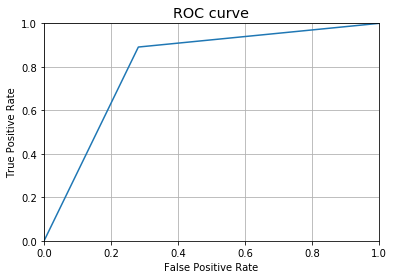

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 7. Save the model

In [20]:
joblib.dump(mlp, 'NeuralNetwork - Other_Patients - Second Run - Ratio 1.pkl') 

['NeuralNetwork - Other_Patients - Second Run - Ratio 1.pkl']